In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

# Reading Data 

df=pd.read_csv('Eluvio_DS_Challenge.csv')

df
df1=df.loc[:,['up_votes','title','author']]


In [61]:
# I used TF-IDF Intially it did not work
"""
import string
string.punctuation

from nltk.corpus import stopwords
stopw=stopwords.words('english')

def msg_cleaning(msg):
    Test_remove_punct=[i for i in msg if i not in string.punctuation]
    Test_join_free_punct=''.join(Test_remove_punct)
    Test_join_free_stopw=[i for i in Test_join_free_punct.split() if i.lower() not in stopwords.words('english')]
    return Test_join_free_stopw

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

Tfvectorizer=TfidfVectorizer(analyzer=msg_cleaning,max_df=80, min_df=10)

tweets_Tfcountvectorizer=Tfvectorizer.fit_transform(df2['title'],)

Xf=tweets_Tfcountvectorizer.toarray()

y=df2['up_votes']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(Xf,y,test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import classification_report,confusion_matrix
1
y_predict_test=NB_classifier.predict(X_test)
2
cm=confusion_matrix(y_test,y_predict_test)

cm

print(classification_report(y_test,y_predict_test))

The above code didnot work since the data was large and my pc couldnot handle the array of TF-iDF values"""

"\nimport string\nstring.punctuation\n\nfrom nltk.corpus import stopwords\nstopw=stopwords.words('english')\n\ndef msg_cleaning(msg):\n    Test_remove_punct=[i for i in msg if i not in string.punctuation]\n    Test_join_free_punct=''.join(Test_remove_punct)\n    Test_join_free_stopw=[i for i in Test_join_free_punct.split() if i.lower() not in stopwords.words('english')]\n    return Test_join_free_stopw\n\nfrom sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer\n\nTfvectorizer=TfidfVectorizer(analyzer=msg_cleaning,max_df=80, min_df=10)\n\ntweets_Tfcountvectorizer=Tfvectorizer.fit_transform(df2['title'],)\n\nXf=tweets_Tfcountvectorizer.toarray()\n\ny=df2['up_votes']\n\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test= train_test_split(Xf,y,test_size=0.2)\n\nfrom sklearn.naive_bayes import MultinomialNB\nNB_classifier=MultinomialNB()\nNB_classifier.fit(X_train,y_train)\n\nfrom sklearn.metrics import classification_report,confusion_mat

# Using Vader Sentiment analysis

In [62]:
#pip install vaderSentiment

In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
senti_obj = SentimentIntensityAnalyzer()


In [64]:
def sentiment(x):    
    if x >= 0.05 :
        y='Positive'

    elif x <= - 0.05 :
        y="Negative"

    else :
        y="Neutral"
    return y

In [65]:
ds=df1
ds

,up_votes,title,author
0,3,Scores killed in Pakistan clashes,polar
1,2,Japan resumes refuelling mission,polar
2,3,US presses Egypt on Gaza border,polar
3,1,Jump-start economy: Give health care to all,fadi420
4,4,Council of Europe bashes EU&UN terror blacklist,mhermans
...,...,...,...
509231,5,Heil Trump : Donald Trump s alt-right white...,nonamenoglory
509232,1,There are people speculating that this could b...,SummerRay
509233,1,Professor receives Arab Researchers Award,AUSharjah
509234,1,Nigel Farage attacks response to Trump ambassa...,smilyflower


In [66]:
ds['positive']=ds['title'].apply(lambda x:senti_obj.polarity_scores(x)['pos'] )

ds['negative']=ds['title'].apply(lambda x:senti_obj.polarity_scores(x)['neg'] )

ds['neutral']=ds['title'].apply(lambda x:senti_obj.polarity_scores(x)['neu'] )
ds['compound']=ds['title'].apply(lambda x:senti_obj.polarity_scores(x)['compound'] )

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ds['author'])
ds['author']=le.transform(ds['author'])
ds

,up_votes,title,author,positive,negative,neutral,compound
0,3,Scores killed in Pakistan clashes,69315,0.000,0.529,0.471,-0.6705
1,2,Japan resumes refuelling mission,69315,0.000,0.000,1.000,0.0000
2,3,US presses Egypt on Gaza border,69315,0.000,0.000,1.000,0.0000
3,1,Jump-start economy: Give health care to all,47884,0.348,0.000,0.652,0.4939
4,4,Council of Europe bashes EU&UN terror blacklist,62766,0.000,0.362,0.638,-0.5267
...,...,...,...,...,...,...,...
509231,5,Heil Trump : Donald Trump s alt-right white...,66229,0.195,0.000,0.805,0.4404
509232,1,There are people speculating that this could b...,28544,0.000,0.000,1.000,0.0000
509233,1,Professor receives Arab Researchers Award,1240,0.467,0.000,0.533,0.5423
509234,1,Nigel Farage attacks response to Trump ambassa...,75836,0.000,0.293,0.707,-0.4404


# Regression to predict Compund values using upvotes

XG_Boost

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xf=ds['up_votes']
X= np.array(Xf).reshape((len(Xf), 1))
y=ds['compound']

#pip install xgboost

# check xgboost version
import xgboost
print(xgboost.__version__)

# create an xgboost regression model
from xgboost import XGBRegressor
xgb_r = XGBRegressor()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

from sklearn.metrics import accuracy_score

y

#X_train,X_test,y_train,y_test

xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred)

print("R2 : % f" %(R2))

1.4.0
RMSE :  0.419504
R2 : -0.000262


In [144]:
XG_boost=[rmse,R2]
XG_boost

[0.4195044389516388, -0.00026233726130020507]

 </b>ADDING AUTHOR COLUMN VALUES TO X DATA

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=ds.loc[:,['up_votes','author']]
y=ds['compound']

#pip install xgboost

# check xgboost version
import xgboost
print(xgboost.__version__)

# create an xgboost regression model
from xgboost import XGBRegressor
xgb_r = XGBRegressor()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

from sklearn.metrics import accuracy_score

y

#X_train,X_test,y_train,y_test

xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred)

print("R2 : % f" %(R2))

1.4.0
RMSE :  0.416481
R2 :  0.008486


C:\Users\liaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [146]:
XG_boost_with_author=[rmse,R2]
XG_boost_with_author

[0.4164810470418858, 0.008485956230526948]

Linear Regression

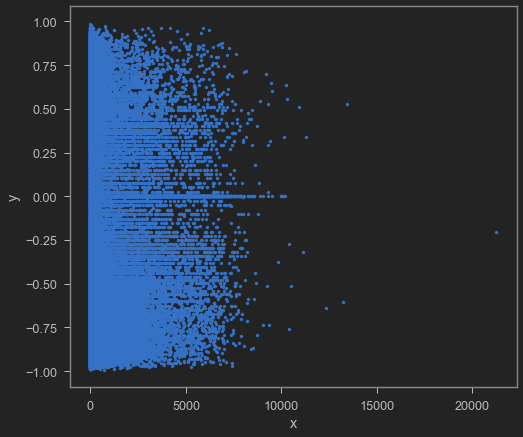

Coefficients: 
 [-1.21969485e-06  2.12868818e-07]
RMSE :  0.418092
R2 :  0.000083


In [147]:


import numpy as np
import matplotlib.pyplot as plt

X=ds.loc[:,['up_votes','author']]
x=ds['up_votes']
y=ds['compound']

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred)

print("R2 : % f" %(R2))

In [148]:
linear_reg=[rmse,R2]
linear_reg

[0.41809220131089225, 8.309155847852079e-05]

In [149]:
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, ranges, LabelSet
output_notebook()

counts= [round(linear_reg[1],8), round(XG_boost[1],8), round(XG_boost_with_author[1],8)]
fruits = ['Linear_Regression','XG_boost','XG_boost_with_Author']
  

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

p_R2 = figure(x_range=fruits, plot_height=250, toolbar_location=None, title="R2_Values_Predicting_Compound_Sentiment")
p_R2.vbar(x='fruits', top='counts', width=0.9, source=source, 
       line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))
labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')
p_R2.add_layout(labels)

p_R2.xgrid.grid_line_color = None
p_R2.y_range.start = round(min(counts),7)-0.002
p_R2.y_range.end = round(max(counts),7)+0.002
p_R2.legend.orientation = "horizontal"
p_R2.legend.location = "top_center"
show(p_R2)

Loading BokehJS ...

C:\Users\liaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\Users\liaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [150]:
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, ranges, LabelSet
output_notebook()

counts= [linear_reg[0], XG_boost[0], XG_boost_with_author[0]]
fruits = ['Linear_Regression','XG_boost','XG_boost_with_Author']
  

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

p_RMSE = figure(x_range=fruits, plot_height=250, toolbar_location=None, title="RMSE Values_Predicting_Compound_Sentiment")
p_RMSE.vbar(x='fruits', top='counts', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))
labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')
p_RMSE.add_layout(labels)

p_RMSE.xgrid.grid_line_color = None
p_RMSE.y_range.start = min(counts)-0.1
p_RMSE.y_range.end = max(counts)+0.1
p_RMSE.legend.orientation = "horizontal"
p_RMSE.legend.location = "top_center"
show(p_RMSE)

Loading BokehJS ...

In [151]:
from bokeh.io import output_notebook, show
from bokeh.layouts import row
R1=row(p_RMSE,p_R2)



# To Predict up_votes based on compund sentiment

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=ds['compound']
X= np.array(X).reshape((len(X), 1))
y=ds['up_votes']
y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred)

print("R2 : % f" %(R2))

RMSE :  547.783502
R2 : -0.002569


In [153]:
XG_boost=[rmse,R2]
XG_boost

[547.7835024756276, -0.002568842637426627]

Using Author Values

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=ds.loc[:,['compound','author']]
y=ds['up_votes']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred))
print("RMSE : % f" %(rmse))

from sklearn.metrics import r2_score
R2=r2_score(y_test, y_pred)

print("R2 : % f" %(R2))

RMSE :  532.389324
R2 :  0.011211


C:\Users\liaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [155]:
XG_boost_with_author=[rmse,R2]
XG_boost_with_author

[532.3893240318356, 0.01121057059888364]

In [156]:
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, ranges, LabelSet
output_notebook()

counts= [round(XG_boost[1],8), round(XG_boost_with_author[1],8)]
fruits = ['XG_boost','XG_boost_with_Author']
  

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

p_R2 = figure(x_range=fruits, plot_height=250, toolbar_location=None, title="R2_Values_Predicting_Up_votes")
p_R2.vbar(x='fruits', top='counts', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))
labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-14.5, y_offset=0, source=source, render_mode='canvas')
p_R2.add_layout(labels)

p_R2.xgrid.grid_line_color = None
p_R2.y_range.start = round(min(counts),7)-0.0000001
p_R2.y_range.end = round(max(counts),7)+0.002
p_R2.legend.orientation = "horizontal"
p_R2.legend.location = "top_center"
show(p_R2)

Loading BokehJS ...

C:\Users\liaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\Users\liaqu\AppData\Local\Programs\Python\Python38\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [157]:
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, ranges, LabelSet
output_notebook()

counts= [round(XG_boost[0],8), round(XG_boost_with_author[0],8)]
fruits = ['XG_boost','XG_boost_with_Author']
  

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

p_RMSE = figure(x_range=fruits, plot_height=250, toolbar_location=None, title="RMSE_Values_Predicting_Up_votes")
p_RMSE.vbar(x='fruits', top='counts', width=0.9, source=source, 
       line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))
labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')
p_RMSE.add_layout(labels)

p_RMSE.xgrid.grid_line_color = None
p_RMSE.y_range.start = min(counts)-10
p_RMSE.y_range.end = max(counts)+10
p_RMSE.legend.orientation = "horizontal"
p_RMSE.legend.location = "top_center"
show(p_RMSE)

Loading BokehJS ...

In [158]:
from bokeh.io import output_notebook, show
from bokeh.layouts import row
R2=row(p_RMSE,p_R2)



In [159]:
from bokeh.layouts import column
show(column(R1,R2))